In [195]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [173]:
wine = datasets.load_wine()


In [174]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [175]:
df.shape

(178, 14)

In [176]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Test Train Split

In [177]:
X = df
y = X.pop('target')

In [178]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [179]:
X.shape

(178, 13)

In [180]:
y.unique()

array([0, 1, 2])

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [182]:
X_train.shape

(142, 13)

In [183]:
X_test.shape

(36, 13)

Train Classifier

In [184]:
knn = KNeighborsClassifier(n_neighbors=3)

In [185]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [186]:
knn.score(X_test, y_test)

0.8333333333333334

Tunning Sensitivity of Model to ``n_neighbors``

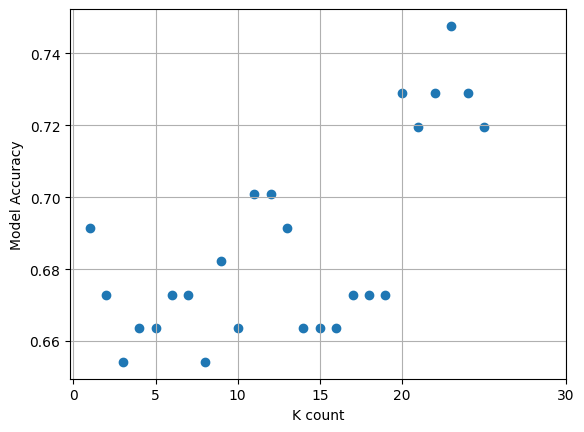

In [136]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('K count')
plt.ylabel('Model Accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.xticks([0, 5, 10, 15, 20, 30])
plt.show()

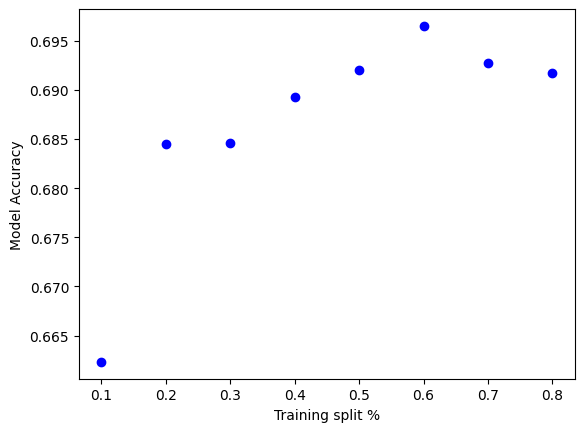

In [111]:
test_sizes = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

knn = KNeighborsClassifier(n_neighbors=5)

plt.figure()

for test_size in test_sizes:
    scores = []

    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-test_size)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    
    plt.plot(test_size, np.mean(scores), "bo")
    
plt.xlabel("Training split %")
plt.ylabel("Model Accuracy")
plt.show()

Make Predictions

In [187]:
prediction = knn.predict(X_test)

In [188]:
prediction

array([0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2])

In [189]:
y_test

15     0
134    2
87     1
136    2
151    2
100    1
27     0
116    1
34     0
157    2
176    2
143    2
81     1
53     0
113    1
150    2
22     0
46     0
169    2
28     0
115    1
170    2
175    2
107    1
67     1
93     1
99     1
159    2
66     1
121    1
8      0
108    1
111    1
129    1
148    2
158    2
Name: target, dtype: int32

In [192]:
cm = confusion_matrix(y_test, prediction)

array([[ 8,  0,  0],
       [ 0, 13,  2],
       [ 2,  2,  9]], dtype=int64)

In [193]:
cm

array([[ 8,  0,  0],
       [ 0, 13,  2],
       [ 2,  2,  9]], dtype=int64)

In [ ]:
plt.figure(figsize=(8,7))